### Geometric Computer Vision, Skoltech, 2021

**Alexey Artemov, Sofia Potapova**

## 1. Camera pose and extrinsics

**Task 1b. (2 point)** Compose camera poses

We have $M_1$ and $M_2$ - two different extrinsic matrices, such as

$x_0$ - 3D point in world frame

$x_1 = M_1x_0$ - 3D point in camera frame, set by $M_1$ relative to world

$x_2 = M_2x_1$ - 3D point in camera frame, set by $M_2$ relative to camera frame $M_1$


Implement the following functions in CameraPose class:

1) *compose_camera_to_world*

2) *compose_world_to_camera*

In [ ]:
class CameraPose:
    
    # copy code from seminar here
    
    def compose_world_to_camera(self, other_pose):
        """Compose camera poses C_1, C_2, ... (defined relative to each other),
        computing transforms from world frame to an innermost camera frame.

        Equivalent to:
        x_world = <some point>
        other_pose.world_to_camera(
            pose.world_to_camera(
                x_world
            )
        )
        
        Usage: pose = pose.compose_world_to_camera(relative_pose)
        """
        
        transform = <...>
        return CameraPose(transform)
        

    def compose_camera_to_world(self, other_pose):
        """Compose camera poses C_1, C_2, ... (defined relative to each other),
        computing transforms from innermost camera frame to the world frame.

        Equivalent to:
        x_local = <some point>
        pose.camera_to_world(
            pose_local.camera_to_world(
                x_local
            )
        )
        
        Usage: pose = pose.compose_camera_to_world(relative_pose)
        """
        transform = <...>
        return CameraPose(transform)


In [ ]:
# Composed camera pose has the following coordinate system:
# Z-axis is pointed to the center of a world (as we did during the seminar)
# rotated by angle alpha around X-axis

init_pose = CameraPose(np.identity(4))

camera_pose_1 = CameraPose.from_camera_origin([0.2, 0.3, -0.5])

alpha, beta, gamma = 0.1, 0.0, 0.0
camera_pose_2 = CameraPose(tt.euler_matrix(alpha, beta, gamma, 'rxyz'))

In [ ]:
x_world = np.random.rand(3)

composed_pose = init_pose.compose_world_to_camera(camera_pose_1).compose_world_to_camera(camera_pose_2)

x_final = composed_pose.transform_world_to_camera(x_world)

x_1 = camera_pose_1.transform_world_to_camera(x_world)
x_2 = camera_pose_2.transform_world_to_camera(x_1)

assert np.allclose(x_final, x_2)

In [ ]:
## Check compose_camera_to_world function by yourself

## 2. Camera intrinsics and image formation

**Task 2a. (1 point)** For cube mesh choose camera_pose (0, 0, 1) and get the perspective and orthogonal projections on camera frame. 

**Hint.** For perspective projection do all the steps from the seminar. For orthogonal projection decide, how to change the camera matrix. 

You should get:

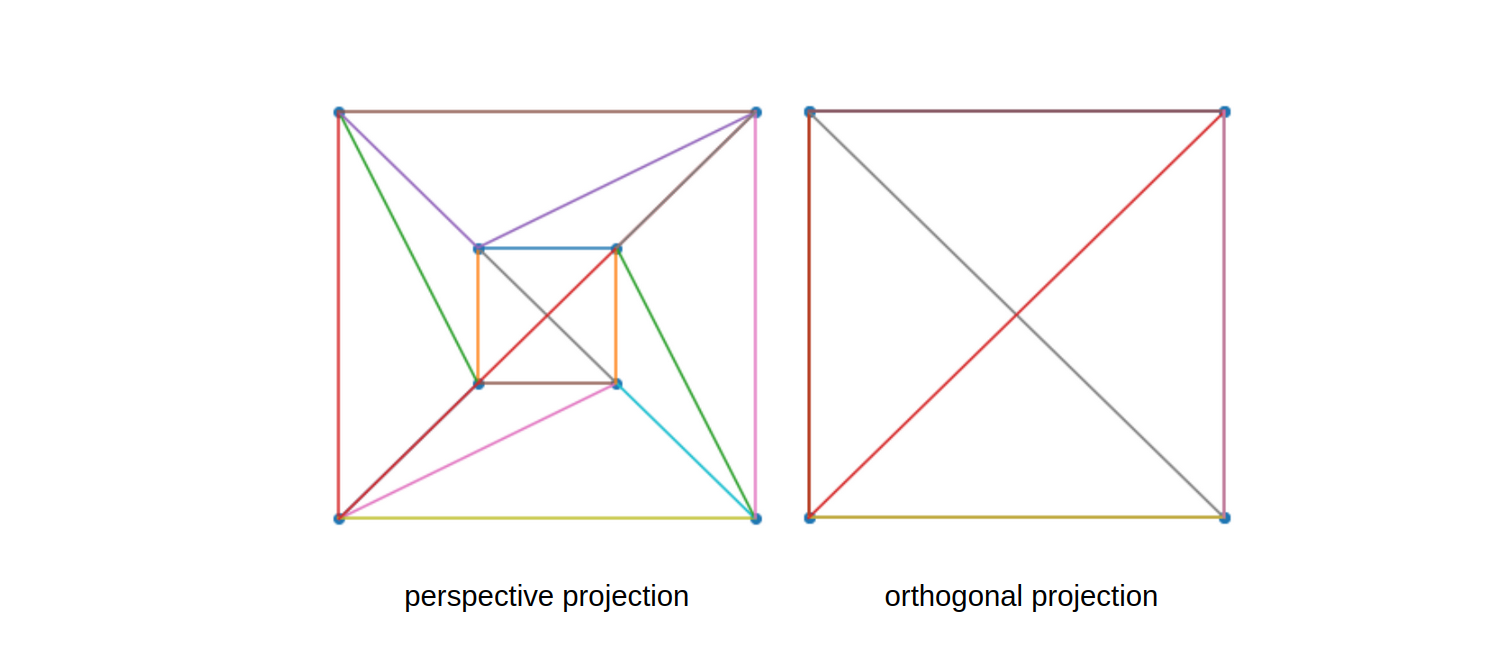

In [ ]:
### Your solution here ###

**Task 2b. (1 point)** Experiment with intrinsics, camera_poses and different types of projections. Illustrate some projections

In [ ]:
### Your solution here ###

## 3. Raycasting

**Task 3a. (0.5 point)** Using *RaycastingImaging* get depth maps from sample_data/scene.ply. Chosen camera_origins should cover the majority of the scene

**Task 3b. (1.5 point)** Having depth maps and corresponding camera_origins, reconstruct point cloud

**Hint:** For each depth_map and camera_origin, you should get point cloud (we already did it during the seminar). When you have all the point clouds in world_frame, you'll get the final point cloud as its combination. 

In [ ]:
### Your solution here ###

## 4. Reprojection

**Task 4c. (3 points)** Having _depth_map_a_, _camera_origin_a_ and _camera_origin_b_, get _depth_map_b_.

1) Load mesh sample_data/shark.ply

2) Choose two different camera poses $A$ and $B$

3) Using *RaycastingImaging* generate _depth_map_a_ from camera $A$, _depth_map_b_ from camera $B$

4) Get point cloud from _depth_map_a_

5) Reproject this point cloud to camera $B$

6) Illustrate resulting image and _depth_map_b_, compare

In [ ]:
### Your solution here ###